# Example 10.2: Parabolic PDEs: a first example

Solve the differential equation (i.e. find $\phi$ for later times):

$\frac{\partial \phi}{\partial t} = \frac{ \partial^2 \phi}{\partial x^2} + S(x,t)$,

for $S=0$ and $\phi(0,t) = \phi(1,t) = 0$, satisfied by the initial condition of a Gaussian centered about $x=1/2$:

$\phi(x,t=0) = e^{-20(x-1/2)^2} - e^{-20(x-3/2)^2} - e^{-20(x+1/2)^2}$,

where the latter two "image" Gaussians approximately ensure the boundary conditions at $x=1$ and $x=0$, respectively. 

Use the naive discretization formula:

$\phi^{n+1} = (1 - \hat{H} \Delta t) \phi^n + S^n \Delta t$, 

where $(H\phi)_i\equiv -\frac{1}{h^2} ( \phi_i + \phi_{i-1} - 2 \phi_i)$.

Integrate up to $t_\mathrm{max} = 0.045$ with a time steps $\Delta t = 0.00075$ and $\Delta t = 0.0050$, over a lattice with $N=25$. 

Compare to the analytical solution:

$\phi(x,t) = \tau^{-1/2} \left[ e^{-20(x-1/2)^2/\tau} - e^{-20(x-3/2)^2/\tau} - e^{-20(x+1/2)^2/\tau} \right]$, where $\tau = 1 + 80t$.

In [1]:
import numpy as np

# Define the initial function:
def phiInitialfunc(x):
    """The initial function"""
    return np.exp(-20 * (x-0.5)**2) - np.exp(-20*(x-3/2)**2) - np.exp(-20*(x+1/2)**2)

# define the S function:
def Sfunc(x,t):
    """The S function for the parabolic PDE"""
    return 0.

# define the exact solution:
def phiExact(x,t):
    """Returns the exact solution of the problem"""
    tau = 1 + 80 * t
    phiex = tau**(-0.5) * ( np.exp(-20 * (x-0.5)**2/tau) - np.exp(-20 * (x-1.5)**2/tau) - np.exp(-20*(x+0.5)**2/tau))
    return phiex

# define the function that evolves a given x on a lattice using the naive discretization
# phiInitial is the initial form of the function, i.e. phi(x,0)
# S is the function that defines the PDE
# tmax is the maximum time 
# Deltat is the time increment
# N is the number of lattice intervals (i.e. N+1 lattice points) 
def EvolveNaive(phiInitial, S, Deltat, tmin, tmax, N):
    """Evolves an initial function according to the differential equation defined by S"""
    # calculate the spacing between lattice points
    h = 1/N
    # calculate the number of time steps:
    nt = int((tmax-tmin)/Deltat)
    # discretize the initial function on the lattice:  
    x = np.linspace(0,1,N+1)
    phii = phiInitial(x)
    # list of numpy arrays to hold the time-stepped lattices
    phi = [phii] # start with the initial condition
    # loop over time:
    for ti in range(nt):
        phi.append(np.zeros(N+1)) # add the next time step
        # loop over space:
        for i in range(1,N):
            x = i*h
            # update: 
            phi[ti+1][i] = (phi[ti][i] + Deltat/h**2 * (phi[ti][i+1] + phi[ti][i-1] - 2 * phi[ti][i])) + S(i*h,ti*Deltat) * Deltat
    return phi



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Run: 
Deltat = 0.00075
tmin = 0
tmax = 0.045
N = 25

phiSol = EvolveNaive(phiInitialfunc, Sfunc, Deltat, tmin, tmax, N)

# test that we have the right number of solutions: 
print('Number of time steps=',len(phiSol))


# change the timestep:
Deltat = 0.005
phiSol2 = EvolveNaive(phiInitialfunc, Sfunc, Deltat, tmin, tmax, N)



Number of time steps= 61


Let's now plot the $t=0$ and $t=t_\mathrm{max}$ solutions:

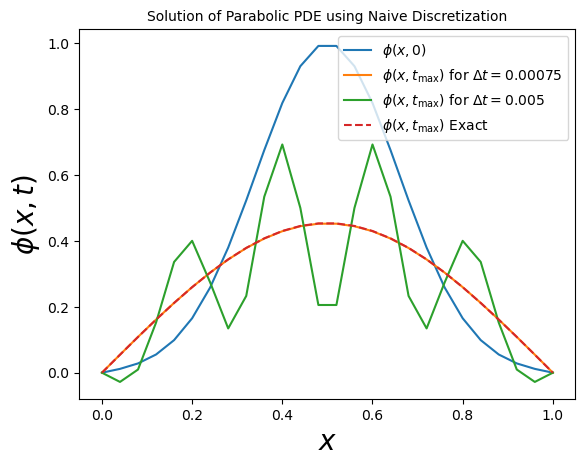

In [3]:
# Plot the solution: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$\phi(x,t)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Solution of Parabolic PDE using Naive Discretization', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
x = np.linspace(0,1,N+1)
ax.plot(x, phiSol[0], label=r'$\phi(x,0)$') 
ax.plot(x, phiSol[-1], label=r'$\phi(x,t_\mathrm{max})$ for $\Delta t=0.00075$', ls='-') 
ax.plot(x, phiSol2[-1], label=r'$\phi(x,t_\mathrm{max})$ for $\Delta t=0.005$', ls='-') 
ax.plot(x, phiExact(x,0.045), label=r'$\phi(x,t_\mathrm{max})$ Exact', ls='--') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here